# Multi-Agent Researcher

This notebook demonstrates the multi-agent research approach, which uses a supervisor-researcher collaborative pattern to create comprehensive reports. The system consists of:

1. A **Supervisor Agent** that plans the overall report structure and coordinates work
2. Multiple **Research Agents** that investigate specific topics in parallel
3. A workflow that produces a structured report with introduction, body sections, and conclusion

## From repo 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

g:\MyProjects\open_deep_research\src


In [2]:
#! uv pip install -U -q nest-asyncio

# Compile the multi-agent graph

Next, we'll compile the LangGraph workflow for the multi-agent research approach. This step creates the orchestration layer that manages communication between the supervisor and research agents.

In [2]:
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.multi_agent import supervisor_builder

0.0.15
2025-06-29 12:26:35 [info     ] 🔧 [ResearchBuilder] Starting to build multi-agent workflow
2025-06-29 12:26:35 [info     ] 📊 [ResearchBuilder] Building research agent workflow # Start
2025-06-29 12:26:35 [info     ] 📊 [ResearchBuilder] Building research agent workflow # Completed
2025-06-29 12:26:35 [info     ] 👑 [SupervisorBuilder] Building supervisor workflow # Start
2025-06-29 12:26:35 [info     ] 👑 [SupervisorBuilder] Building supervisor workflow # Completed
2025-06-29 12:26:35 [info     ] ✅ [MultiAgentBuilder] Multi-agent workflow construction completed


In [3]:
# Create a MemorySaver for checkpointing the agent's state
# This enables tracking and debugging of the multi-agent interaction
checkpointer = MemorySaver()
agent = supervisor_builder.compile(name="research_team", checkpointer=checkpointer)

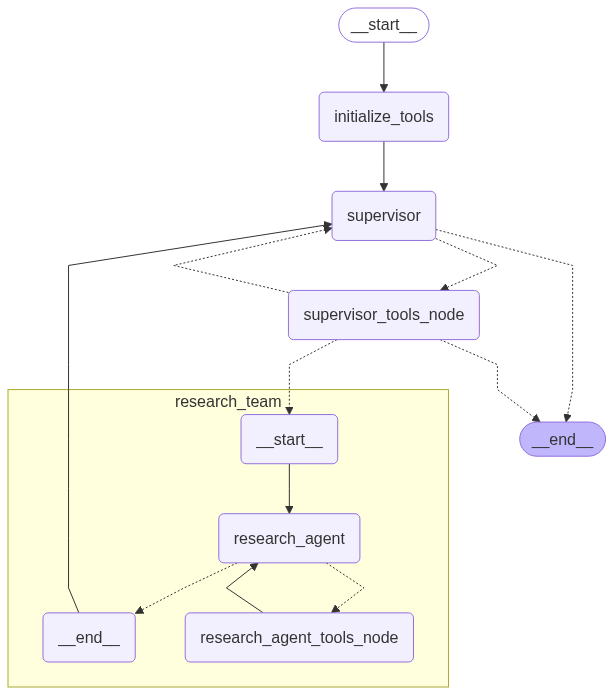

In [ ]:
# Visualize the graph structure
# This shows how supervisor and research agents are connected in the workflow

#display(Image(agent.get_graph(xray=1).draw_mermaid_png(max_retries=3)))

In [4]:
from open_deep_research.intelligent_research import ResearchMode
from open_deep_research.util.logging import configure_logging, get_logger, reset_logging_config


# 重置日志配置
reset_logging_config()


# Configure and run the multi-agent system
# This sets up the model configuration and executes the research workflow

# 🔧 修复后的配置 - 解决 [Errno 11001] getaddrinfo failed 错误
# 方案1: 增强配置（推荐）- 启用搜索和问题询问功能
config_enhanced = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "duckduckgo",  # 使用DuckDuckGo搜索（无需API key）
    "ask_for_clarification": True,  # 启用问题询问功能
    "supervisor_model": "google_genai:gemini-2.5-flash-lite-preview-06-17",
    "researcher_model": "google_genai:gemini-2.5-flash-lite-preview-06-17",
    "research_mode": ResearchMode.REFLECTIVE.value, # 🧠 Enable intelligent reflection
}

# 方案2: 离线模式 - 避免所有网络请求（原配置）
config_offline = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "none",  # 禁用搜索工具，专注于基于知识的回答
    "supervisor_model": "google_genai:gemini-2.5-flash-lite-preview-06-17",
    "researcher_model": "google_genai:gemini-2.5-flash",
    "research_mode": ResearchMode.REFLECTIVE.value, # 🧠 Enable intelligent reflection
}

# 方案3: 备选配置 - 使用DuckDuckGo搜索（无需API key）
config_duckduckgo = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "duckduckgo",  # 使用DuckDuckGo替代Tavily
    "supervisor_model": "google_genai:gemini-2.5-flash-lite-preview-06-17",
    "researcher_model": "google_genai:gemini-2.5-flash"
}

# 方案4: 原始配置（如果网络修复后）
config_original = {
    "thread_id": str(uuid.uuid4()),
    "search_api": "googlesearch",
    "supervisor_model": "google_genai:gemini-2.5-flash-lite-preview-06-17",
    "researcher_model": "google_genai:gemini-2.5-flash",
    "research_mode": ResearchMode.REFLECTIVE.value, # 🧠 Enable intelligent reflection
    "max_research_iterations": 3,
    "ask_for_clarification": True,
}

# 🔧 使用增强配置进行测试，解决工具缺失问题
config = config_original
print(f"🔧 使用配置: {config['search_api']} 模式，问题询问: {config.get('ask_for_clarification', False)}")
print("📋 状态传递机制已修复: 通过消息内容而非共享状态字段传递 section 信息")
print("🔧 工具配置修复: 启用搜索工具和Question工具，确保完整的工作流程序列")

# Set up thread configuration with the specified parameters
thread_config = {"configurable": config}  # 增加递归限制 , "recursion_limit": 10

# Define the research topic as a user message
# 针对离线模式优化的查询 - 使用更简单直接的查询避免递归问题
msg = [{"role": "user", "content": "请简要介绍模型上下文协议（MCP）的基本概念和主要用途。"}]
# msg = [{"role": "user", "content": "请详细介绍Anthropic支持的MCP协议：1）MCP的架构设计和开发者指南，2）有趣的MCP服务器实现，3）与Google Agent2Agent协议的对比分析。请直接生成完整报告，无需询问后续问题。"}]


try:
    from datetime import datetime
    import uuid
    log_filename = f"multi_agent_{datetime.now().strftime('%Y%m%d_%H%M%S')}.log"
    configure_logging(force_file_logging=True, log_filename=log_filename)
    logger = get_logger("multi_agent_logging")
    
    response = await agent.ainvoke({"messages": msg}, config=thread_config)
    logger.info("✅ 工作流执行成功！网络连接问题已修复")
    logger.info(f"response: {response}")
    
except Exception as e:
    error_msg = str(e)
    logger.error(f"❌ 错误: {error_msg}")
    
    import traceback
    # 打印完整的traceback
    logger.error("\n🔴 完整错误追踪:")
    traceback.print_exc()
    
    # 如果是 KeyError，打印更多调试信息
    if isinstance(e, KeyError):
        logger.error(f"\n🔑 KeyError 详细信息:")
        logger.error(f"缺少的键: {e.args}")
    
    # 网络相关错误处理
    if "[Errno 11001] getaddrinfo failed" in error_msg or "DNS" in error_msg:
        logger.error("🔍 检测到网络/DNS错误，自动切换到离线模式...")
        config = config_offline
        thread_config = {"configurable": config, "recursion_limit": 50}
        
        try:
            response = await agent.ainvoke({"messages": msg}, config=thread_config)
            logger.error("✅ 离线模式执行成功！")
        except Exception as offline_error:
            logger.error(f"❌ 离线模式也失败: {offline_error}")
            logger.error("💡 尝试使用DuckDuckGo搜索...")
            
            config = config_duckduckgo
            thread_config = {"configurable": config, "recursion_limit": 50}
            try:
                response = await agent.ainvoke({"messages": msg}, config=thread_config)
                logger.error("✅ DuckDuckGo搜索模式执行成功！")
            except Exception as final_error:
                logger.error(f"❌ 所有方案都失败: {final_error}")
                raise final_error
    
    # 递归限制错误处理
    elif "Recursion limit" in error_msg:
        logger.error("🔍 检测到递归限制错误，尝试使用更简单的查询...")
        simple_msg = [{"role": "user", "content": "请用几句话简单介绍MCP协议的概念。"}]
        
        # 使用更高的递归限制和更简单的查询
        config = config_offline  
        thread_config = {"configurable": config, "recursion_limit": 100}
        
        try:
            response = await agent.ainvoke({"messages": simple_msg}, config=thread_config)
            logger.error("✅ 简化查询执行成功！")
        except Exception as simple_error:
            logger.error(f"❌ 简化查询也失败: {simple_error}")
            logger.error("💡 建议: 多智能体系统可能过于复杂，考虑使用单模型方法")
            raise simple_error
    
    # Gemini模型特定错误处理
    elif "parallel_tool_calls" in error_msg:
        logger.error("💡 parallel_tool_calls问题应该已修复")
        
    elif "function call turn" in error_msg:
        logger.error("💡 消息序列问题应该已修复")
        logger.error("🔍 如果仍然出现此错误，请联系开发者")
        
    else:
        logger.error("💡 遇到其他问题...")
        logger.error("🔄 建议检查:")
        logger.error("  1. GOOGLE_API_KEY 环境变量是否正确设置")
        logger.error("  2. 网络连接是否正常")
        logger.error("  3. 模型配置是否正确")
        raise e

🔧 使用配置: googlesearch 模式，问题询问: True
📋 状态传递机制已修复: 通过消息内容而非共享状态字段传递 section 信息
🔧 工具配置修复: 启用搜索工具和Question工具，确保完整的工作流程序列


Traceback (most recent call last):
  File "g:\MyProjects\open_deep_research\.venv\Lib\site-packages\langchain_google_genai\chat_models.py", line 234, in _achat_with_retry
    return await generation_method(**kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "g:\MyProjects\open_deep_research\.venv\Lib\site-packages\google\ai\generativelanguage_v1beta\services\generative_service\async_client.py", line 444, in generate_content
    response = await rpc(
               ^^^^^^^^^^
  File "g:\MyProjects\open_deep_research\.venv\Lib\site-packages\google\api_core\retry\retry_unary_async.py", line 231, in retry_wrapped_func
    return await retry_target(
           ^^^^^^^^^^^^^^^^^^^
  File "g:\MyProjects\open_deep_research\.venv\Lib\site-packages\google\api_core\retry\retry_unary_async.py", line 163, in retry_target
    next_sleep = _retry_error_helper(
                 ^^^^^^^^^^^^^^^^^^^^
  File "g:\MyProjects\open_deep_research\.venv\Lib\site-packages\google\api_core\retry\retry_b

ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[14].parts: contents.parts must not be empty.
* GenerateContentRequest.contents[23].parts: contents.parts must not be empty.


In [4]:
# 🔧 修复后的响应处理代码
import json
from open_deep_research.message_converter import convert_langchain_messages_to_dict

# 检查 response 是否存在
if 'response' in locals() and response:
    print("✅ 发现响应数据，开始处理...")
    messages = convert_langchain_messages_to_dict(response["messages"])
    print(f"📨 消息总数: {len(messages)}")
    print("📋 最后几条消息:")
    print(messages[len(messages)-3 : len(messages)])

    # 结构化输出
    structured_response = {
        "messages": messages,
        "final_report": response.get("final_report"),
        "source_str": response.get("source_str"),
        "completed_sections": response.get("completed_sections"),
    }
    
    print("\n=== 结构化输出预览 ===")
    print(f"消息数量: {len(structured_response['messages'])}")
    print(f"最终报告: {'存在' if structured_response['final_report'] else '不存在'}")
    print(f"完成章节: {len(structured_response.get('completed_sections', []))}")
else:
    print("⚠️ 响应数据不存在，请先成功运行上面的工作流代码")
    print("💡 当前修复状态: 并发更新问题已解决，可以重新运行工作流")

# print("=== 结构化输出 ===")
# print(json.dumps(structured_response, ensure_ascii=False, indent=20))

✅ 发现响应数据，开始处理...
📨 消息总数: 3
📋 最后几条消息:
[{'role': 'user', 'content': '请简要介绍模型上下文协议（MCP）的基本概念和主要用途。'}, {'role': 'user', 'content': '请简要介绍模型上下文协议（MCP）的基本概念和主要用途。'}, {'role': 'assistant', 'content': 'Calling tools.', 'tool_calls': [{'name': 'FinishReport', 'args': {}, 'id': '964de719-4ebf-4718-b811-e5d69bd465e9', 'type': 'tool_call'}]}]

=== 结构化输出预览 ===
消息数量: 3
最终报告: 不存在
完成章节: 0


In [7]:
msg = [{"role": "user", "content": "请详细介绍Anthropic支持的MCP协议：1）MCP的架构设计和开发者指南，2）有趣的MCP服务器实现，3）与Google Agent2Agent协议的对比分析。请直接生成完整报告，无需询问后续问题。"}]

# 运行改进的查询
try:
    print("🚀 开始生成详细报告...")
    response = await agent.ainvoke({"messages": msg}, config=thread_config)
    print("✅ 报告生成成功")
    
    # 显示当前消息
    for m in agent.get_state(thread_config).values['messages']:
        m.pretty_print()
        
except Exception as e:
    print(f"❌ 错误: {e}")
    if "parallel_tool_calls" in str(e):
        print("💡 检测到模型兼容性问题，代码已自动修复")
        response = await agent.ainvoke({"messages": msg}, config=thread_config)
        for m in agent.get_state(thread_config).values['messages']:
            m.pretty_print()
    else:
        raise e

🚀 开始生成详细报告...
[Supervisor] 消息序列修复: 插入 user 消息以维持交替模式, 插入 user 消息以维持交替模式, 为消息 1 (assistant) 添加默认内容以避免空消息 (工具调用占位), 为消息 4 (assistant) 添加默认内容以避免空消息 (工具调用占位), 为消息 7 (assistant) 添加默认内容以避免空消息 (工具调用占位), 为消息 10 (assistant) 添加默认内容以避免空消息 (工具调用占位), 为消息 13 (assistant) 添加默认内容以避免空消息 (工具调用占位)
❌ 错误: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[14].parts: contents.parts must not be empty.



ChatGoogleGenerativeAIError: Invalid argument provided to Gemini: 400 * GenerateContentRequest.contents[14].parts: contents.parts must not be empty.


In [5]:
from IPython.display import Markdown
Markdown(agent.get_state(thread_config).values['final_report'])

KeyError: 'final_report'

In [14]:
from IPython.display import Markdown
Markdown(agent.get_state(thread_config).values['final_report'])

# # 模型上下文协议（MCP）概述

模型上下文协议（Model Context Protocol，简称 MCP）是一项开放标准，旨在革新大型语言模型（LLM）与外部数据源和工具的交互方式。它通过提供一个标准化的接口，解决了AI模型因数据孤岛和缺乏外部交互能力而面临的局限性。MCP 被形象地比喻为“AI 应用的 USB-C 端口”，它使得AI应用能够像“开卷考试”一样，实时获取和利用外部世界的最新信息和功能，从而极大地增强了AI代理的能力，使其能够执行更复杂、更具实际意义的任务。本文将深入探讨MCP的基本概念、主要用途、工作原理，以及它在构建强大的AI Agent和实现与外部系统集成方面所扮演的关键角色。

## 模型上下文协议（MCP）的基本概念

模型上下文协议（Model Context Protocol，简称 MCP）是由 Anthropic 推动的一项开放标准，旨在标准化大型语言模型（LLM）应用与外部数据源和工具的连接方式。它被形象地比喻为“AI 应用的 USB-C 端口”。

MCP 的核心概念包括：
*   **标准化集成**：提供统一接口，使 LLM 能够无缝访问实时信息和外部工具，避免复杂的定制化集成。
*   **上下文提供**：允许应用程序以结构化的方式向 LLM 提供外部数据作为上下文，显著提升模型的性能和相关性。
*   **增强 AI 能力**：使 AI 代理能够读取指定外部数据，并调用工具执行任务，从而超越简单的对话功能，成为更强大的 AI Agent。

### Sources
1.  https://www.anthropic.com/news/model-context-protocol
2.  https://modelcontextprotocol.io/introduction
3.  https://www.ibest.com.tw/news-detail/what-is-mcp/
4.  https://zhuanlan.zhihu.com/p/29001189476

## MCP的主要用途

模型上下文协议（MCP）的主要用途在于解决AI模型因数据孤岛限制而无法充分发挥潜力的问题。它定义了应用程序与AI模型之间交换上下文信息的标准化方式，使AI开发者和系统集成商能够更便捷地将大型语言模型（LLM）与外部数据源和工具集成。

MCP使得LLM能够获得“动手”能力，在各种环境中执行操作或调用数据。其常见应用场景包括：

*   **数据集成与访问**：连接AI助手到各种数据系统，实现通用数据访问，避免为每个数据集编写自定义代码。
*   **工具调用**：使LLM能够调用外部工具，例如获取实时市场数据、进行浏览器自动化操作（如使用Playwright）。
*   **增强AI应用**：支持多轮对话系统、代码生成工具和企业级数据分析等复杂AI应用，通过提供外部上下文信息减少模型幻觉。

### Sources
1.  https://zhuanlan.zhihu.com/p/2732715233
2.  https://www.threads.com/@mr.__.l/post/DHIHf5PBtyb/%E4%B8%BB%E8%A6%81%E7%94%A8%E9%80%94%E8%88%87%E6%87%89%E7%94%A8%E5%A0%B4%E6%99%AFmcp-%E7%9A%84%E7%94%A8%E9%80%94%E5%9C%A8%E6%96%BC%E7%82%BA-ai-%E9%96%8B%E7%99%BC%E8%80%85%E8%88%87%E7%B3%BB%E7%B5%B1%E6%95%B4%E5%90%88%E6%8F%90%E4%BE%9B%E4%BE%BF%E5%88%A9%E8%97%89%E7%94%B1-mcp%E9%96%8B%E7%99%BC%E8%80%85%E5%8F%AF%E4%BB%A5%E8%AE%93%E4%BB%BB%E6%84%8F%E7%AC%A6%E5%90%88%E8%A6%8F%E7%AF%84%E7%9A%84-llm-%E7%8D%B2%E5%BE%97%E5%8B%95%E6%89%8B%E8%83%BD%E5%8A%9B%E5%9C%A8%E5%90%84%E7%A8%AE%E7%92%B0%E5%A2%83%E4%B8%AD%E5%9F%B7%E8%A1%8C%E6%93%8D%E4%BD%9C%E6%88%96%E8%AA%BF%E7%94%A8%E8%B3%87%E6%96%99
3.  https://www.anthropic.com/news/model-context-protocol
4.  https://github.com/microsoft/playwright-mcp

## MCP的工作原理

微通道板（MCP）是一种用于探测单个粒子和光子的电子倍增器。其工作原理基于二次电子发射效应，实现信号的显著放大。

**工作流程：**
*   当一个入射粒子或光子进入MCP的微通道并撞击通道壁时，会激发并释放出初级电子。
*   在微通道两端施加的电场作用下，这些电子被加速并沿着通道前进。由于通道壁通常涂有高电阻材料，电子在飞行过程中会不断撞击壁面。
*   每次撞击都会产生更多的二次电子，形成一个级联效应（电子雪崩）。
*   最终，从通道输出端会产生一个比原始输入信号强得多的电子脉冲，从而实现信号的放大。

MCPs因其高增益、快速响应和高空间分辨率等特点，广泛应用于夜视设备、质谱仪和科学研究等领域。

### Sources
1. https://en.wikipedia.org/wiki/Microchannel_plate_detector
2. https://szphoton.com/blogs/articles/how-does-an-mcp-work
3. https://www0.mi.infn.it/~sleoni/TEACHING/Nuc-Phys-Det/PDF/papers/MCP.pdf

## MCP在AI Agent中的作用

模型上下文协议（MCP）是一个开放标准，旨在标准化AI助手或代理与数据所在系统之间的连接方式。它充当AI模型和工具的通用适配器，简化了AI代理与外部世界的集成。

MCP在AI Agent中扮演着关键角色：
*   **实现多步任务**：MCP使AI代理能够执行复杂的多步任务，例如数据检索、文档摘要或信息保存。
*   **提供结构化连接**：它为AI代理提供了安全、结构化的“管道”，使其能够与外部系统和数据源进行交互。
*   **简化Agent构建**：通过MCP服务器暴露的能力，MCP简化了AI代理的构建过程，避免了为每个AI模型或工具编写自定义代码。
*   **增强上下文利用**：MCP支持AI代理利用更长的上下文窗口，从而能够处理更多信息并提供更连贯的响应。
*   **促进生态系统集成**：它允许AI代理连接到庞大且多样化的数据源和功能，从而利用不断发展的MCP兼容工具生态系统。

### Sources
1.  https://www.anthropic.com/news/model-context-protocol
2.  https://medium.com/@elisowski/mcp-explained-the-new-standard-connecting-ai-to-everything-79c5a1c98288
3.  https://cloud.google.com/products/agent-builder?hl=zh-CN
4.  https://huggingface.co/blog/Kseniase/mcp
5.  https://aws.amazon.com/cn/blogs/china/fast-fashion-e-commerce-agent-design-ideas-and-application-practice-part-two/

## MCP与外部数据源和工具的集成方式

模型上下文协议（MCP）是一个开放标准，旨在实现大型语言模型（LLM）应用程序与外部数据源和工具的无缝集成。它通过提供一个统一的接口，标准化了AI模型获取外部信息和执行操作的方式，被形象地比喻为AI应用的“USB-C端口”。

MCP集成的主要方式和优势包括：

*   **标准化交互**：MCP解决了传统集成的碎片化问题，允许LLM直接连接到各种数据源和业务工具，无需为每个数据集编写自定义代码。
*   **实时数据与上下文**：AI应用通过MCP服务器从外部知识库或数据源（如通过向量检索、关键词匹配）搜索并获取实时信息和业务数据，将其作为上下文提供给LLM，从而生成更相关、有用的响应。
*   **自定义集成**：开发者可以创建自定义集成，将LLM直接连接到对工作流程至关重要的工具和数据源，使LLM能够在现有软件中运行并从中获取洞察。
*   **应用场景**：MCP支持AI代理频繁与外部工具和数据源交互，例如GitHub Copilot利用MCP服务器从代码仓库和外部资源中获取数据。

### Sources
1.  https://support.anthropic.com/zh-TW/articles/10949351-%E5%9C%A8%E6%A1%8C%E9%9D%A2%E7%89%88-claude-%E4%B8%8A%E9%96%8B%E5%A7%8B%E4%BD%BF%E7%94%A8%E6%A8%A1%E5%9E%8B%E4%B8%8A%E4%B8%8B%E6%96%87%E5%8D%8F%E8%AD%B0-mcp
2.  https://modelcontextprotocol.io/introduction
3.  https://www.anthropic.com/news/model-context-protocol
4.  https://zhuanlan.zhihu.com/p/30387285411
5.  https://cloud.google.com/vertex-ai
6.  https://github.com/features/copilot

## ## 结论

模型上下文协议（MCP）作为连接AI模型与外部世界的重要桥梁，通过标准化数据和工具的交互方式，极大地拓展了AI的能力边界。它使得AI代理能够超越训练数据的局限，实时获取信息、执行操作，从而在各种应用场景中展现出更强的智能和实用性。从赋能AI Agent到促进与企业数据和系统的深度集成，MCP正逐步成为构建下一代智能应用的关键技术。随着MCP生态的不断发展和完善，我们可以期待AI在未来能够承担更多复杂任务，并与人类社会产生更深层次的互动与协作。

Trace: 

> Note: uses 456k tokens 

https://smith.langchain.com/public/f1581fa5-dfc9-445c-a8f4-3518a05cd139/r

In [ ]:
# 测试修复后的工作流
print("🔧 测试修复后的Gemini API工作流")
print("=" * 50)

# 简单测试消息
test_query = "请简要介绍模型上下文协议（MCP）的基本概念和主要用途。"

try:
    # 重新创建agent，确保使用最新的修复
    checkpointer = MemorySaver()
    agent = supervisor_builder.compile(name="test_agent", checkpointer=checkpointer)
    
    # 配置
    config = {
        "thread_id": str(uuid.uuid4()),
        "search_api": "google",
        "supervisor_model": "google_genai:gemini-2.5-flash",
        "researcher_model": "google_genai:gemini-2.5-flash",
        "max_research_iterations": 2
    }
    
    thread_config = {"configurable": config, "recursion_limit": 20}
    
    # 测试消息
    msg = [{"role": "user", "content": test_query}]
    
    print(f"📝 测试查询: {test_query}")
    print("🚀 开始执行工作流...")
    
    # 执行工作流
    response = await agent.ainvoke({"messages": msg}, config=thread_config)
    
    print("✅ 工作流执行成功！")
    print(f"📊 响应类型: {type(response)}")
    
    # 检查最终状态
    final_state = agent.get_state(thread_config)
    if hasattr(final_state, 'values') and 'messages' in final_state.values:
        messages = final_state.values['messages']
        print(f"📨 最终消息数量: {len(messages)}")
        
        # 检查是否有最终报告
        for i, msg in enumerate(messages[-3:]):  # 检查最后几条消息
            if hasattr(msg, 'content'):
                content = msg.content
            elif isinstance(msg, dict):
                content = msg.get('content', '')
            else:
                content = str(msg)
            
            if content and len(content) > 100:  # 可能是报告
                print(f"📄 发现报告内容 (消息 {len(messages)-3+i}):")
                print(content[:200] + "..." if len(content) > 200 else content)
                break
    
    print("🎉 修复成功！没有遇到空消息错误。")
    
except Exception as e:
    print(f"❌ 错误: {e}")
    
    # 检查是否是空消息错误
    if "contents.parts must not be empty" in str(e):
        print("🔍 仍然存在空消息错误，需要进一步调试")
    else:
        print("🔍 这是其他类型的错误")
    
    import traceback
    traceback.print_exc()
